<a href="https://colab.research.google.com/github/jdeweese1/ENGL_415_Final_Report/blob/master/Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical overview of Data Visualizations and Data Science and Best Practices: An Overview
#### Jarod J. DeWeese, Kansas State University


## Abstract
  ### Definitions
  - Data Science - TODO
  - Data Visualization - TODO

## Introduction
This report by no means is meant to be a comprehensive guide to every technique, language and framework that can be used to analyze data. Rather, this report aims to be a "survey" that increases the reader's exposure to such concepts and offers resources for learning more about the concepts covered here.

### About the format (Jupyter notebook)
As you've no doubt noticed, this report is in a bit of an untraditional format. Rather than opt for a static document such as a Microsoft Word or Google doc, I chose a [Jupyter](https://jupyter.org/) notebook.

## Body TODO
For the purposes of this report I will the language I will primarily cover is the Python programming language, as it is currently the leading language academics and industry professionals use for data science work. In addition to it's prevalance in the real world, the Python tools and frameworks can be run interactively inside this Jupyter notebook allowing from greater depth of exploration of such tools. 

### Exploration of the Jupyter notebook format
Because Jupyter notebooks are such an integral part of how many information professionals wrangle data, having an understanding of how to best use this format will put you well on your way to developing an understanding of your data. A few features of the notebook that will prove useful are as follows: ability to run real code inside of the notebook, easily obtaining user input inside a notebook, ability to install third party packages to extend functionality, and use the simple, human readable syntax of [Markdown](https://daringfireball.net/projects/markdown/) to format your notebook. 

Because this such a widespread format, there are integrations with many different services supporting the notebooks. For instance, I'm writing this report using Google Colab and I can then easily save into my GitHub repo. If there's a tool you'd like to use, but can't find one, you can develop your own solution and share it with the world!

Below see an example of an investment calculator highlighting some of the features mentioned above. With this simple markdown form, enter the principal of your investment, investment life span, and yearly interest rate. This code snippet will then tell you the value of the investment when it matures.

In [73]:
#@title Compound interest calculator
#@markdown Enter data the below fields then hit the play button on the code box.

investment_principal_dollars =   100#@param {type: "number"}
investment_timespan_years =  30#@param {type: "number"}
yearly_interest_rate = .08 #@param {type: "number", min:"0", max:".9"}
from math import e
from typing import Union


def do_interest(p:Union[int, float], r:float, years:int) -> float:
    assert 0 <= r <= 1
    
    return p * (e)**(r*years) # p*e^(rt)



final_money = do_interest(p=investment_principal_dollars, r=yearly_interest_rate, years=investment_timespan_years)

print(f'After investing ${investment_principal_dollars} at {yearly_interest_rate*100}% for {investment_timespan_years} years you will have ${final_money}')


After investing $100 at 8.0% for 30 years you will have $1102.3176380641598



### Data Visualization

## Why visualize data?
As researcher or scientist, most of the data we collect and analyze will be in tabular form. While this is great and makes it much easier to crunch the numbers, raw data is hard for non-technical people to understand. Executives, grant committes, and funding agencies likely don't care about the intricacies of your research, they want to know that their resources are being well spent. When these stakeholders see your report, the likely will not all of the text, but are much more likely to stop and look at the visualizations you've provided.

Here are a few takeaways that apply to the majority of data visualization techniques:
- Graphs and charts should explain themselves, the reader should not have to read the surrounding text to understand the data being presented. - [NCBI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4008059/)
- In addition to the absolute numbers, including what ratio of the whole if possible serves to contextualize the data being presented. For example during the fall semester of 2019, [K-State had a student enrollment of 21,719](https://www.k-state.edu/registrar/statistics/enrbyyr.html), however that absolute number on its own doesn't mean very much as we can't contextualize it. However if we know that enrollment was 22,221 the year before we can calculate that enrollment is down by 500 students, or 2.3%. Other ways to contextualize data include examining growth or acceleration rates, change from mean and standard deviation. By using these techniques, your figures will be descriptive, as well as more useful in proving impacts to your stakeholders. 
- Figures make the most sense when they have proper labels. This includes labeling the legend, axises including units, as well as making sure the figure has a descriptive title.

## Case Studies - COVID-19 graphs
I will critique two data visualizations that have been developed to track the spread of COVID-19 around the globe: [COVID-19 Pink](https://covid19.pink/world)(Pink)
![If you're running this in GitHub, try opening in Colab instead to see the image](https://drive.google.com/uc?id=1nnBXBN6ZTkZq2BB4AJI8jGpSmTmNAyBX) and [Aatishb's Covid Trends Site](https://aatishb.com/covidtrends/)(Trends) ![If you're running this in GitHub, try opening in Colab instead to see the image](https://drive.google.com/uc?id=1Z9aQmGqR2EPFWce3Gas08fafpOn_ccb8).

Both of these graphs provide time analysis depictions of the number of COVID-19. However the the Pink site is better at immediately conveying information of which areas of the world have the most cases, as well as the total number of cases via heat map. However, after looking at the trends dashboard for a moment you realize it carries more information than the other. This graph shows number of cases, as well as **case trajectory**, which is the more important metric to follow when assessing the severity of a virus that can spread exponentially. Note that for exponentially growing functions, using a logarithmic scale allows for seeing more insightful changes in growth.

For both of these sites, they offer a slider that allows you to visualize the spread **through time**, or for any slice of time for which they have data for. For the Pink site, this control can be found across the app, allowing for a greater degree of analysis.

The Pink site provides a variety of useful tools for tracking the spread of COVID-19 including a heatmap of each country, as well as providing the number of confirmed cases, deaths, and fatality rate, conveniently on one graph. By leveraging visualization libraries in JavaScript, they were able to make the site mor dynamic by adding hover and help text to help the better interpret the data they are looking at.

The Pink site also provides a case trajectory page, however it conveys much less information than the Trends site. This is mainly due to the way they set up the axises:
1. The Trends site y axis measures *new* cases, whereas Pink's measures total number of cases. As you can see, there a a number of sudden drops in the graph which include Taiwan, China, Hong Kong and South Korea. These sudden plummets indicates that the number of new cases (in the past week) has decreased.
2. The x axis of the Trends graph shows *total* cases, which in this case also serves as a proxy variable for time, as the number of total cases cannot decrease. This provides more data then using dates as an x axis, as when a on the graph stops traveling to the right, they have effectively slowed or stopped the spread. 


---




### Visualization tools
- [Matplotlib](https://matplotlib.org/) module is written in Python and design to create graphs, animations and other visualizations.
- [Pandas](https://pandas.pydata.org/) library describes itself as "a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.". Pandas speciallizes in reading, modeling and manipulating data quickly and efficently.



- Plotly
- Numpy


#### Matplotlib exercise
Below, see a simple example of matplotlib to visualize the time value of money (TVM). TVM represents the potential of money to grow over time, and that **the sooner money is invested** the greater it's earning capacity is. In this example, our investment matures in 20 years, represented by the x axis and the y axis represents the future of that dollar. When using a rate of .12 we see the TVM of $1.00 invested now is $12.42, the TVM of $1.00 invested in 12 years instead, that dollar's earning capacity is only worth 1/3 of the dollar we put in now.

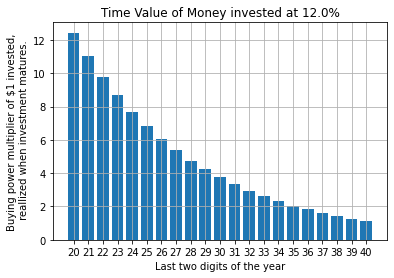

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from collections import OrderedDict

yearly_interest_rate = .12 #@param {type: "number", min:"0", max:".9"}
cur_year = datetime.now().year
investment_period = 21
maturity_year = cur_year + investment_period
data = OrderedDict()

for i in range(investment_period):
    year_num = cur_year + i
    years_left_to_appreciate = maturity_year - year_num
    data[year_num] = do_interest(p=1,r=yearly_interest_rate, years=years_left_to_appreciate)

x = np.arange(investment_period)
labels = [str(k)[-2:] for k in data.keys()]
vals = [v for v in data.values()]

plt.bar(x, height=vals)
plt.title(f"Time Value of Money invested at {yearly_interest_rate*100}%")
plt.xticks(x,labels=labels)
plt.xlabel('Last two digits of the year')
plt.ylabel('Buying power multiplier of $1 invested,\n reallized when investment matures.')
plt.grid(b=True)
plt.show()

Pandas Exercise
Inside the Google Colab environment, we have access to a few sample data sets. For this exercise we will be using California housing information pulled from the 1990 Census. Below, see an example .



In [0]:
import pandas as pd
housing_data = pd.read_csv('sample_data/california_housing_train.csv')


          longitude      latitude  ...  median_income  median_house_value
count  17000.000000  17000.000000  ...   17000.000000        17000.000000
mean    -119.562108     35.625225  ...       3.883578       207300.912353
std        2.005166      2.137340  ...       1.908157       115983.764387
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.790000     33.930000  ...       2.566375       119400.000000
50%     -118.490000     34.250000  ...       3.544600       180400.000000
75%     -118.000000     37.720000  ...       4.767000       265000.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]


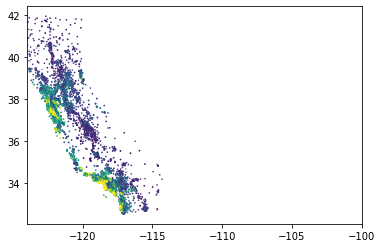

In [71]:
# Lets combine Pandas and matplotlib
from matplotlib import pyplot as plt
color_scale_factor = housing_data.last_valid_index()/(256**3)
house_values_colored = housing_data.median_house_value/color_scale_factor
axes = plt.gca()
axes.set_xlim([-124,-100])

# Describe the data
print(housing_data.describe())
plt.scatter(x=housing_data.longitude, y=housing_data.latitude, c=house_values_colored,s=housing_data.median_income/5)

#plt.scatter(x=housing_data.longitude, y=housing_data.median_house_value)


TODO EXPLAIN WHAT THE FIGURE MEANS



### How to find resources

- Talk Python to me
- Those on my resources.md